# Explortary Data Analysis 探索性数据分析
0. Data Schema (Data Dictionary)
    - Present the dataset schema with column names, data types, and descriptions.
    - Helps readers quickly understand the business meaning of each variable.

1. Dataset Overview
    - Display dataset shape (rows × columns).
    - Show column names and data types.
    - Generate descriptive statistics (.describe()) for numerical and categorical variables separately.

2. Data Quality Checks
    - Missing values: count, percentage, and patterns (e.g., whether NA values are linked to business rules like tenure=0).
    - Duplicates: identify and handle duplicate records if any.
    - Data type corrections: ensure numeric fields are truly numeric (e.g., TotalCharges).

3. Data Preprocessing
    - Outlier detection & treatment (boxplots, IQR, z-score).
    - Irrelevant attributes: drop columns like customerID that do not contribute to modeling.
    - Feature adjustments: transform skewed variables, normalize if necessary.

4. Exploratory Data Visualization
    - Churn distribution (target variable).
    - Univariate plots (distribution of tenure, monthly charges, etc.).
    - Bivariate plots (Churn vs. categorical features, churn rate by contract type, etc.).
        - Churn rate by service/demographics
    - Correlation heatmap for numeric features.

5. Conclusion & Insights
    - Categorical encoding: One-hot encoding / Label encoding depending on the model.
    - Feature grouping: group payment methods, contract types, etc. if needed.
    - New features: e.g., AverageCharges = TotalCharges / tenure (for tenure > 0).
    - Export the preprocessed df and proceed to next step, model training.


In [2]:
# create virtual environment
# python -m venv venv
# source venv/bin/activate

# 0. Data Schema

| Column Name          | Data Type                                   | Description                                                                |
| -------------------- | ------------------------------------------- | -------------------------------------------------------------------------- |
| **customerID**       | string                                      | Unique customer identifier (anonymized ID).                                |
| **gender**           | category (Male/Female)                      | Customer’s gender.                                                         |
| **SeniorCitizen**    | integer (0/1)                               | Indicates whether the customer is a senior citizen (1 = Yes, 0 = No).      |
| **Partner**          | category (Yes/No)                           | Whether the customer has a spouse or partner.                              |
| **Dependents**       | category (Yes/No)                           | Whether the customer has dependents (e.g., children, elderly relatives).   |
| **tenure**           | integer (0–72)                              | Number of months the customer has stayed with the company.                 |
| **PhoneService**     | category (Yes/No)                           | Indicates if the customer has phone service.                               |
| **MultipleLines**    | category (Yes/No/No phone service)          | Whether the customer has multiple phone lines.                             |
| **InternetService**  | category (DSL/Fiber optic/No)               | Type of internet service subscribed.                                       |
| **OnlineSecurity**   | category (Yes/No/No internet service)       | Subscription to online security services.                                  |
| **OnlineBackup**     | category (Yes/No/No internet service)       | Subscription to online backup services.                                    |
| **DeviceProtection** | category (Yes/No/No internet service)       | Subscription to device protection services.                                |
| **TechSupport**      | category (Yes/No/No internet service)       | Subscription to technical support services.                                |
| **StreamingTV**      | category (Yes/No/No internet service)       | Subscription to streaming TV services.                                     |
| **StreamingMovies**  | category (Yes/No/No internet service)       | Subscription to streaming movies services.                                 |
| **Contract**         | category (Month-to-month/One year/Two year) | Type of contract the customer holds.                                       |
| **PaperlessBilling** | category (Yes/No)                           | Indicates if the customer uses paperless billing.                          |
| **PaymentMethod**    | category                                    | Payment method (e.g., bank transfer, credit card, electronic check).       |
| **MonthlyCharges**   | float                                       | Amount charged to the customer monthly (USD).                              |
| **TotalCharges**     | float                                       | Total amount charged to the customer (USD).                                |
| **Churn**            | category (Yes/No)                           | Indicates whether the customer has churned (Yes = Churned, No = Retained). |


## The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Business Context:
- Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [3]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Dataset Overview
- Display dataset shape (rows × columns).
- Show column names and data types.
- Generate descriptive statistics (.describe()) for numerical and categorical variables separately.

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Note: We noticed that TotalCharges is a object type, we need to change the data type

In [6]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# 2. Data Quality Checks
- Missing values: count, percentage, and patterns (e.g., whether NA values are linked to business rules like tenure=0).
- Duplicates: identify and handle duplicate records if any.
- Data type corrections: ensure numeric fields are truly numeric (e.g., TotalCharges).

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Note: Appears to have no missing values, but we need to consider ' ' cases

In [9]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# print the rows where TotalCharges is NaN
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Note: 
How to deal with missing values?
1. Consider business context!!!
2. If few, we may drop them.
3. If there are several, we may need to impute them using other values like mean, median, mode or other model predictions.

In [12]:
# list all the rows with tunure = 0 
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Note:
- In this case, it appears that all the rows with missing total charges have tenure = 0, which is the number of months the customer has stayed with the company
- Given that these customers have not stayed with the company for at least one month, there wouldn't be any monthly charge based on the business context.
- So we may use '0' to fill in those missing cells.


In [13]:
# Note: All rows with tenure = 0 have TotalCharges = 0, 
# which is consistent with the business logic that customers who have not stayed with the company 
# for at least one month would not incur any charges.
# df.fillna(df["TotalCharges"].mean())
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df[df['tenure'] == 0].filter(items=['customerID', 'tenure', 'TotalCharges'])

,customerID,tenure,TotalCharges
488,4472-LVYGI,0,0.0
753,3115-CZMZD,0,0.0
936,5709-LVOEQ,0,0.0
1082,4367-NUYAO,0,0.0
1340,1371-DWPAZ,0,0.0
3331,7644-OMVMY,0,0.0
3826,3213-VVOLG,0,0.0
4380,2520-SGTTA,0,0.0
5218,2923-ARZLG,0,0.0
6670,4075-WKNIU,0,0.0


# 3. Data Preprocessing: 
- Outlier detection & treatment (boxplots, IQR, z-score).
- Irrelevant attributes: drop columns like customerID that do not contribute to modeling.
- Feature adjustments: transform skewed variables, normalize if necessary.

In [16]:
# Drop customerID column as it is not relevant for analysis
df = df.drop(columns=['customerID'])

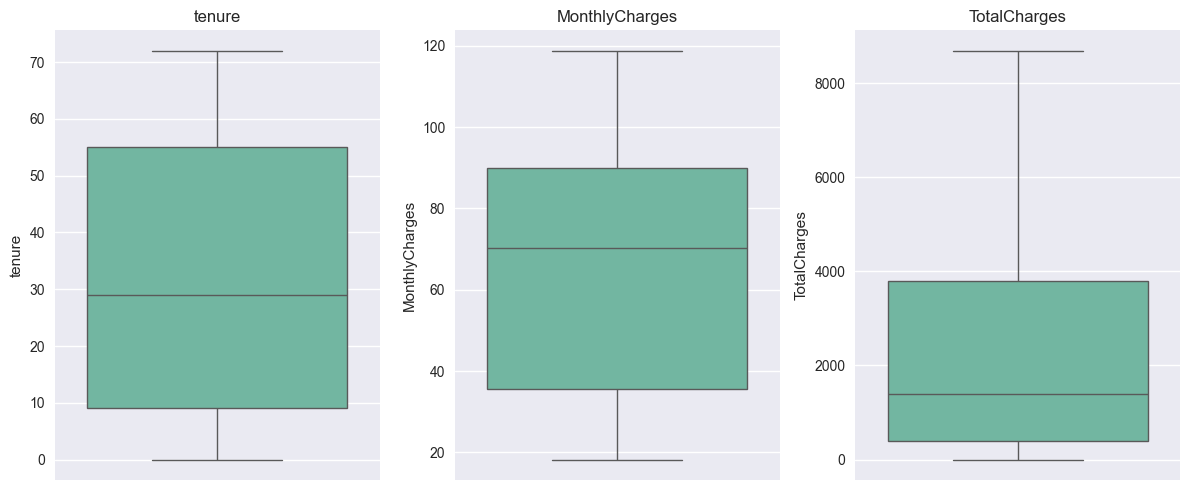

In [17]:
# Outliers we focused on numerical variables:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Note:
1. tenure (0–72, mean = 32.4, std = 24.6)
    - Min = 0 (new customers), Max = 72 (longest contract = 6 years).
    - Values are fully consistent with Telco business logic → no abnormal outliers.

2. MonthlyCharges (18.25–118.75, mean = 64.8, std = 30.1)
    - Minimum close to the basic plan ($18.25), maximum close to premium plan ($118.75).
    - Range between $20–120 is reasonable → high charges reflect premium customers, not outliers.

3. TotalCharges (0–8684.8, mean = 2279.7, std = 2266.8)
    - Min = 0 corresponds to tenure = 0 (new customers).
    - Max ≈ 8700, which matches 72 months × $120 ≈ 8640.
    - Large variation is expected since TotalCharges ≈ tenure × MonthlyCharges.

Conclusion: Extreme values are business-meaningful and therefore not treated as outliers.

### Validation: Test whether TotalCharges = tenure * MonthlyCharges

In [19]:
# Test whether TotalCharges = tenure * MonthlyCharges
df['TotalCharges_check'] = df['tenure'] * df['MonthlyCharges']
df['TotalCharges_check'] = df['TotalCharges_check'].round(2)
df['TotalCharges_check'] = df['TotalCharges_check'].astype(float)
df['TotalCharges_check'].equals(df['TotalCharges'])

False

In [20]:
# Check if there are any discrepancies
discrepancies = df[df['TotalCharges_check'] != df['TotalCharges']]
discrepancies[['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalCharges_check']]

,tenure,MonthlyCharges,TotalCharges,TotalCharges_check
1,34,56.95,1889.50,1936.3
2,2,53.85,108.15,107.7
3,45,42.30,1840.75,1903.5
4,2,70.70,151.65,141.4
5,8,99.65,820.50,797.2
...,...,...,...,...
7038,24,84.80,1990.50,2035.2
7039,72,103.20,7362.90,7430.4
7040,11,29.60,346.45,325.6
7041,4,74.40,306.60,297.6


### Note: TotalCharges 并不是严格等于 tenure × MonthlyCharges，因为客户在不同月份可能变更了套餐/服务，累计账单因此不同

# 4. Explortary Data Visualization
- Univariate Analysis
- Bivariate Analysis
- Correlation Heatmap

In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_check'],
      dtype='object')

## 4.1 Univariate Analysis: Target (Churn distribution)
- 单变量分析: 目标变量 (流失分布)
- 主要目的：看类别分布，是否存在 class imbalance
- Telco 数据里一般是 No ≈ 73%，Yes ≈ 27% → 中度不平衡

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/799716544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='coolwarm')


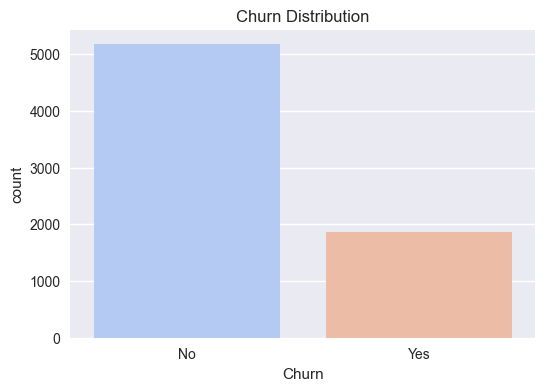

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [22]:
# Target Variable: Churn distribution
# Decide whether we need to do resampling 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

# percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

### Note:
- We might need to perform resampling later due to class imbalance

## 4.2 Univariate Analysis: Numeric features
- 单变量分析: 数值特征 (tenure, MonthlyCharges, TotalCharges)
- 主要目的：看数值特征的分布形态
- 我们重点关注的属性：
    - 异常值
        - 箱线图里是否有极端 outliers？
        - 如果有，树模型（XGB/LGBM）没关系；但线性模型可能需要 winsorize / robust scaler
    - 偏度（skewness）
        - 如果分布严重右偏（如 TotalCharges），Logistic Regression 可以考虑 log 变换，增强线性可分性
        - log 变换的作用：
            - 通过压缩大值，把分布“拉近正态（Gaussian-like）”，让特征和目标的关系更接近线性
            - 例如：收入（Income）、总账单（TotalCharges）、销量这类天然右偏的数据，log 后通常更接近正态
            - 这样 Logistic Regression 学到的边界会更合理，不会被极端值左右
    - 峰度（kurtosis）
        - 高峰度 → 分布集中，长尾更极端；可能影响模型鲁棒性
    - 多峰
        - MonthlyCharges 明显是多峰的（不同套餐价格带）
        - 提示我们可能要 分箱（binning） 来增强解释性，比如低套餐 / 中套餐 / 高套餐 (特征工程)


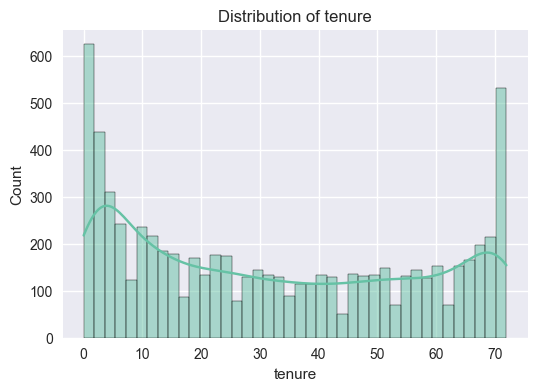

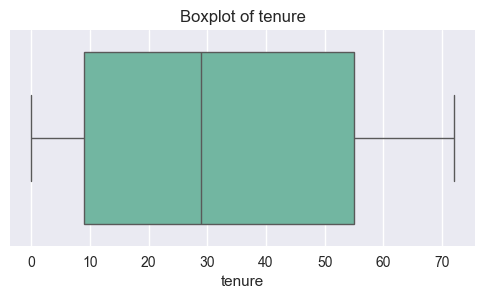

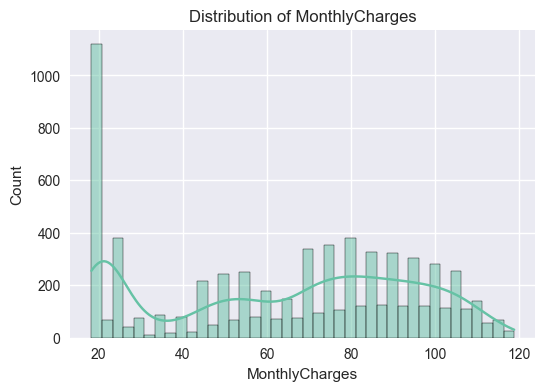

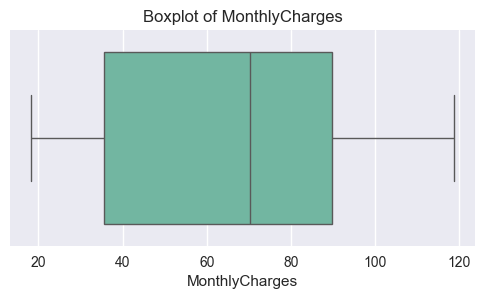

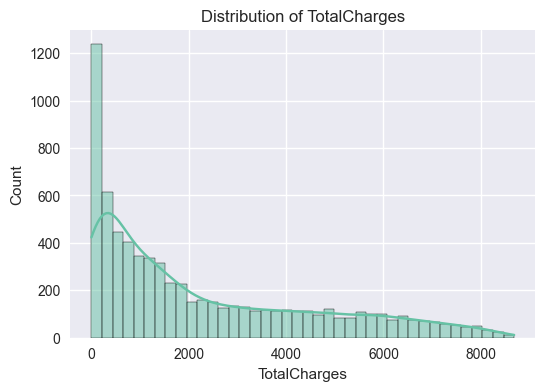

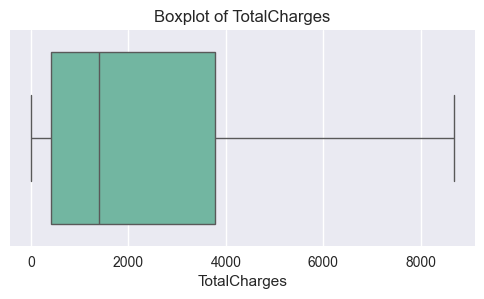

In [23]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, bins=40)
    plt.title(f'Distribution of {col}')
    plt.show()

    # 箱线图检查极端值
    fig, ax = plt.subplots(figsize=(6,2.8))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


### Business Insights:

### 1. Tenure（客户在网月数）

* 分布呈现 **双峰**：

  * **新客户（0–1 月）** 占比非常大，说明公司有大量刚加入的客户。
  * **长期客户（70+ 月）** 也出现一个高峰，说明有忠诚用户群体。
  * **中间（10–60 月）** 分布相对平缓。
* **业务启示**：

  * 新客户 churn 风险高 → onboarding 和 early engagement 至关重要。
  * 长期客户 churn 风险低，迁移成本高 → 可以挖掘交叉销售和增值服务。

### 2. MonthlyCharges（月度账单）

* 分布呈现 **多峰**：

  * \~20 美元有一个大峰（基础套餐）。
  * 60–90 美元区间用户较多（中端套餐）。
  * 100+ 美元用户数量相对少，但仍有一定集中（高端套餐）。
* **业务启示**：

  * 多峰结构反映了套餐分层。
  * 高月费客户贡献收入高，但 churn 可能更敏感（性价比问题）。
  * 低月费客户 churn 风险低，但价值有限。

### 3. TotalCharges（累计账单）

* 分布呈现 **右偏长尾**：

  * 大量用户的 TotalCharges 较低（新客户）。
  * 随 tenure 增加，TotalCharges 自然累积，最高能到 8000+。
* **业务启示**：

  * TotalCharges 实际上是 tenure × MonthlyCharges 的函数 → 高度共线。
  * 高 TotalCharges 用户 churn 风险低，但一旦流失，损失极大。
  * 新客户 TotalCharges=0， churn 风险最高。

---

### Feature Engineering Insights

1. **Tenure 分箱 & 新客户特征**

   * 不同客户生命周期阶段的 churn 风险差异明显：

     * `0–12` = 新用户（刚签约，最容易 churn）
     * `13–36` = 中期用户（已有一定粘性）
     * `37+` = 老用户（忠诚度更高）
   * 特征设计：

     * `tenure_bin` = {新、中、老}
     * `is_new_customer = tenure <= 12`

2. **MonthlyCharges 分箱**

   * 不同价位套餐的 churn 风险差异显著，高费率客户往往更容易 churn。
   * 特征设计：`monthly_bin` = {低费率 (0–40), 中等 (41–80), 高费率 (81+)}

3. **TotalCharges 转换 → AvgCharges**

   * `TotalCharges` 与 `tenure` 高度相关，可能导致多重共线性。
   * 新特征：`AvgCharges = TotalCharges / tenure`（对 tenure=0 的客户设为 0 或 `MonthlyCharges`）。
   * 注意：`TotalCharges` 并不等于 `tenure × MonthlyCharges`，因为客户可能在不同月份调整过套餐或服务，账单并非恒定。
   * 适用性：

     * **树模型（XGB/LGBM）**：`AvgCharges` 可选，主要提升业务可解释性。
     * **Logistic Regression**：建议构造 `AvgCharges`，以降低共线性，并更好反映客户的“平均月消费水平”。

## 4.3 Univariate Analysis: Categorical Features
- 单变量分析: 类别特征（Contract, InternetService, PaymentMethod, Gender, Partner, Dependents…）
- 一般不单独做 Univariate，只需在 Bivariate（Churn vs 类别）中分析。
- 例外情况：如果某个类别特别稀少（极度不均衡），Univariate 分布图可以提示是否要合并或 drop。

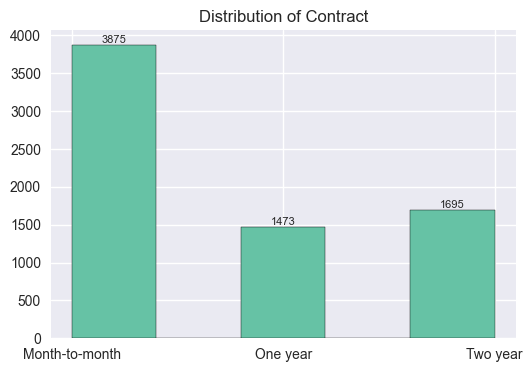

In [24]:
# 画直方图
fig, ax = plt.subplots(figsize=(6,4))
# 绘制直方图
counts, bins, patches = ax.hist(df['Contract'], bins=5, edgecolor='black')

# 在每个柱子上标数字
for rect, count in zip(patches, counts):
    height = rect.get_height()
    if height > 0:  # 只标非零的
        ax.text(rect.get_x() + rect.get_width()/2, height,
                int(height), ha='center', va='bottom', fontsize=8)

ax.set_title('Distribution of Contract')
plt.show()

## 4.4 Bivariate Analysis: Churn Rate by Different Channels/Types of Services
- 双变量分析: 把人群按照渠道/服务类型分，来看churn流失率
- InternetService, PaymentMethod, Contract

In [25]:
# 计算不同channel下的churn率
def churn_rate_by_group(df, group_col):
    churn_rate = (
        df.groupby(group_col)['Churn']
        .value_counts(normalize=True)
        .rename("percentage")
        .mul(100)
        .reset_index()
    )
    churn_rate = churn_rate[churn_rate['Churn'] == "Yes"].drop(columns="Churn")
    return churn_rate.sort_values("percentage", ascending=False)

# InternetService
print("Churn Rate by Internet Service")
display(churn_rate_by_group(df, 'InternetService'))

# PaymentMethod
print("Churn Rate by Payment Method")
display(churn_rate_by_group(df, 'PaymentMethod'))

# Contract
print("Churn Rate by Contract")
display(churn_rate_by_group(df, 'Contract'))


Churn Rate by Internet Service


,InternetService,percentage
3,Fiber optic,41.892765
1,DSL,18.959108
5,No,7.404980


Churn Rate by Payment Method


,PaymentMethod,percentage
5,Electronic check,45.285412
7,Mailed check,19.106700
1,Bank transfer (automatic),16.709845
3,Credit card (automatic),15.243101


Churn Rate by Contract


,Contract,percentage
1,Month-to-month,42.709677
3,One year,11.269518
5,Two year,2.831858


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/635234211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


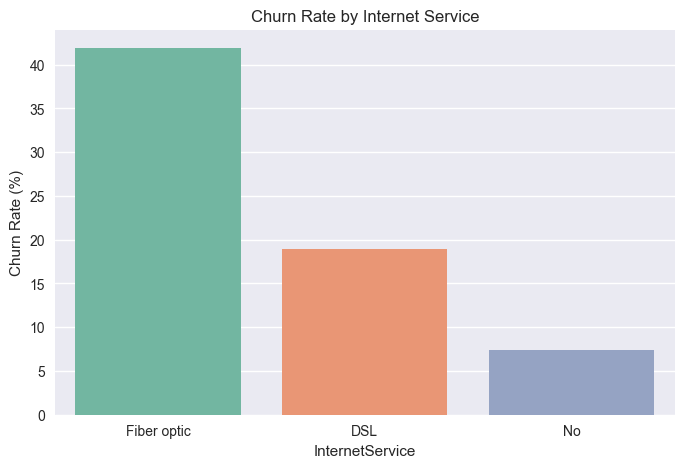

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=churn_rate_by_group(df, 'InternetService'),
    x='InternetService',
    y='percentage',
    palette='Set2'
)
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate (%)")
plt.show()


### Insights:
- Fiber optic 用户 churn 率显著高于 DSL → 说明光纤用户可能对价格更敏感，或者竞争更激烈。

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/891822802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


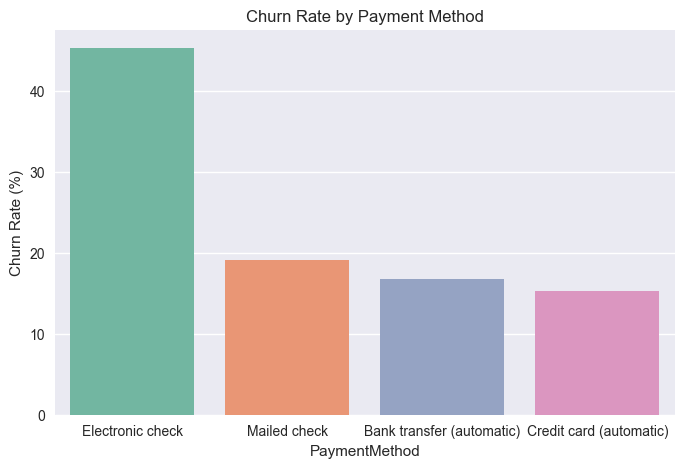

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=churn_rate_by_group(df, 'PaymentMethod'),
    x='PaymentMethod',
    y='percentage',
    palette='Set2'
)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate (%)")
plt.show()


### Insights:
- 支付体验会影响 churn，可推广自动付款方式
- Electronic check 用户 churn 率最高 → 暗示支付体验差/流失风险高，可以考虑引导他们切换到自动转账

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/4243998309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


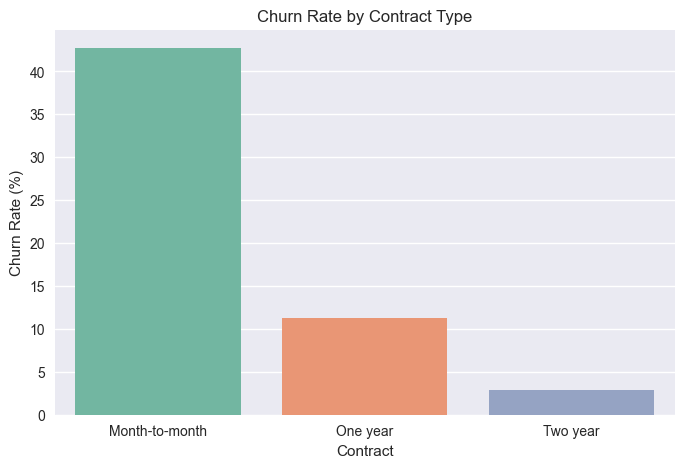

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=churn_rate_by_group(df, 'Contract'),
    x='Contract',
    y='percentage',
    palette='Set2'
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.show()


### Insights:
- 长期合同能显著降低 churn
- Month-to-month 用户 churn 率远高于一年/两年合同 → 产品团队可以考虑用折扣、奖励来提升长期合约渗透率

## 4.5 Bivariate Analysis: Churn Rate by Different Demographics
- 双变量分析: 把人群按照类型(人口统计学)分，来看churn流失率
- gender, SeniorCitizen, Partner, Dependents

In [43]:
def churn_rate_by_group(df, group_col):
    churn_rate = (
        df.groupby(group_col)['Churn']
        .value_counts(normalize=True)
        .rename("percentage")
        .mul(100)
        .reset_index()
    )
    churn_rate = churn_rate[churn_rate['Churn'] == "Yes"].drop(columns="Churn")
    return churn_rate.sort_values("percentage", ascending=False)

# Gender
print("Churn Rate by Gender")
display(churn_rate_by_group(df, 'gender'))

# SeniorCitizen
print("Churn Rate by SeniorCitizen")
display(churn_rate_by_group(df, 'SeniorCitizen'))

# Partner
print("Churn Rate by Partner")
display(churn_rate_by_group(df, 'Partner'))

# Dependents
print("Churn Rate by Dependents")
display(churn_rate_by_group(df, 'Dependents'))


Churn Rate by Gender


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2376666401.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)['Churn']


,gender,percentage
1,Female,26.920872
3,Male,26.160338


Churn Rate by SeniorCitizen


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2376666401.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)['Churn']


,SeniorCitizen,percentage
3,1,41.681261
1,0,23.606168


Churn Rate by Partner


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2376666401.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)['Churn']


,Partner,percentage
1,No,32.957979
3,Yes,19.664903


Churn Rate by Dependents


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2376666401.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)['Churn']


,Dependents,percentage
1,No,31.279140
3,Yes,15.450237


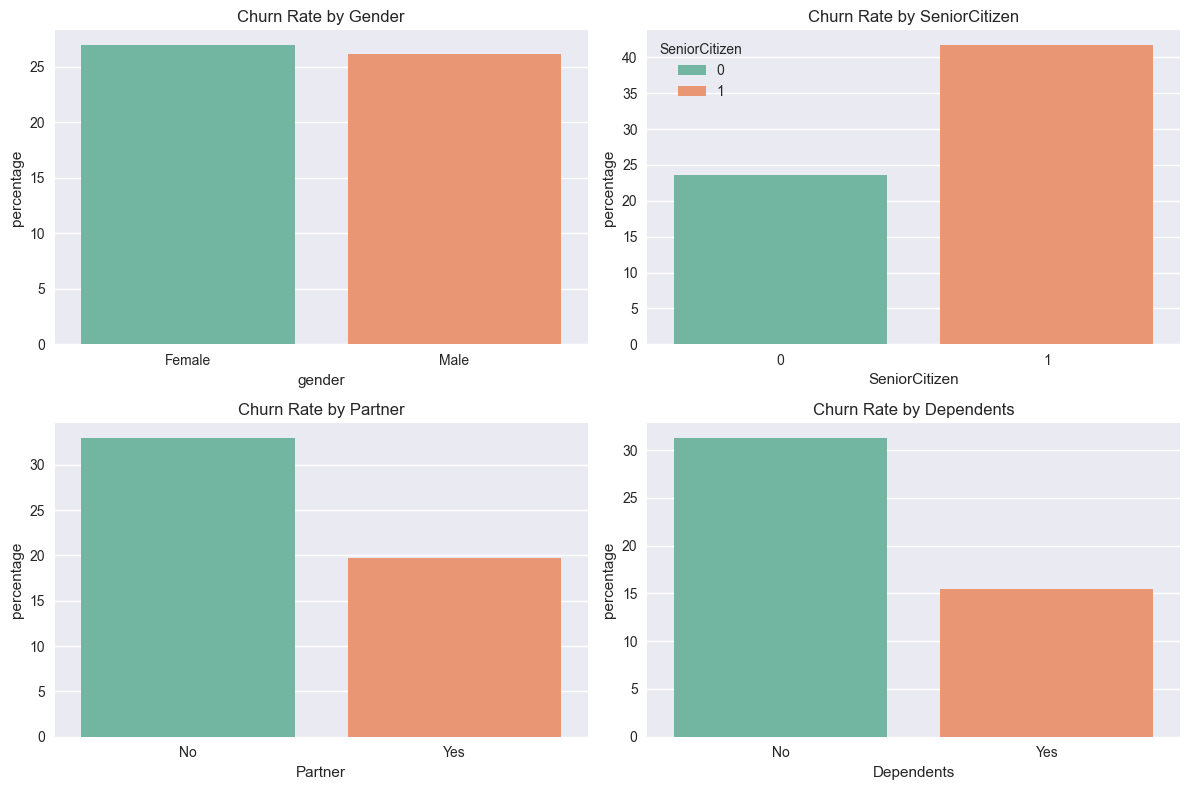

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.barplot(data=churn_rate_by_group(df, 'gender'),
            x='gender', y='percentage', hue='gender', ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Churn Rate by Gender")

sns.barplot(data=churn_rate_by_group(df, 'SeniorCitizen'),
            x='SeniorCitizen', y='percentage', hue='SeniorCitizen', ax=axes[0,1], palette="Set2")
axes[0,1].set_title("Churn Rate by SeniorCitizen")

sns.barplot(data=churn_rate_by_group(df, 'Partner'),
            x='Partner', y='percentage', hue='Partner', ax=axes[1,0], palette="Set2")
axes[1,0].set_title("Churn Rate by Partner")

sns.barplot(data=churn_rate_by_group(df, 'Dependents'),
            x='Dependents', y='percentage', hue='Dependents', ax=axes[1,1], palette="Set2")
axes[1,1].set_title("Churn Rate by Dependents")

plt.tight_layout()
plt.show()


### Business Insights:
1. Churn Rate by Gender
    - Difference bewtween male and female is not significnt, gender might not be a driving factor
    - Gender 不是决定性因素，可考虑丢掉
2. Churn Rate by Senior Citizen
    - Senior citizen has higher churn rate
    - 可能因为价格敏感度高、使用需求少，或者觉得服务复杂
    - 可以考虑为老年用户提供更简化的方案/客服支持
    - 老年用户 churn 高 → 产品要做“老人友好”
3. Churn Rate by Partner
    - Those who do not have a partner have a higher churn rate
    - 单身用户可能更 mobile、更愿意切换供应商
    - 可以对这类用户推出个性化套餐，增强 stickiness 用户粘度
4. Churn Rate by Dependents
    - Those who have no dependents have a higher churn rate
    - 可能因为家庭绑定更多服务、迁移成本高
    - Use Family Plan / Bundle 服务 增加粘性
    - 无家庭绑定用户 churn 高 → 可以设计“家庭套餐”

---

### Feature Engineering Insights:
1. 确认无效特征
    - 比如 Gender → Churn Rate 差异极小，说明这个特征对 churn 几乎没有区分度
    - 在 Logistic Regression 这种对噪音敏感的模型里，可以考虑 drop 掉，避免稀释其他信号
    - 在 XGBoost 里，即使保留 Gender，它权重也会很低，不会影响整体模型性能 → 所以非必须 drop，但可以减少 feature 数量
2. 确认有用特征
    - SeniorCitizen、Partner、Dependents → churn rate 差异明显，这些特征是 高价值的分类变量，模型训练时应该重点保留
    - 甚至可以做进一步的 Feature Engineering，比如：
    - SeniorCitizen = 1 & NoPartner → 风险最高 → 可以构造交互特征 SeniorCitizen*NoPartner
3. 帮助做 Encoding 策略
    - 比如 InternetService 有 Fiber Optic → churn rate 明显更高，那在 one-hot encoding 后，这个类目会直接带强信号
    - 但 Gender 因为无差异，可以直接 binary encode，或者干脆丢弃

---

## 4.6 Bivariate Analysis: Churn Rate by Tenure

* 在 **4.2 单变量分析** 中，我们观察了 `tenure` 的分布，发现客户分布在 **短期（0–12 月）** 和 **长期（接近 72 月）** 两端比较集中。
* 仅从分布图无法判断哪些区间的客户 churn 风险更高，因此我们需要进一步验证。
* 为了更清晰地揭示 `tenure` 与 `churn` 的关系，我们将数值型的 `tenure` **分箱（binning）** 转换为类别型变量，并计算每个区间的 **churn rate**。
* 这种方法属于 **数值变量离散化后的双变量分析**，可以帮助我们确定 **新/中/老客户的合理划分方式**，并为后续的特征工程（如 `is_new_customer`）提供数据依据。

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/3917443794.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn_bol'].mean().reset_index()


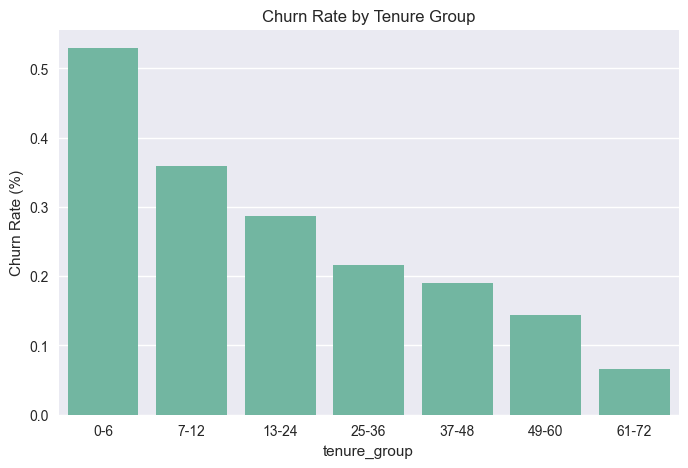

In [32]:
# tenure 分箱
bins = [0, 6, 12, 24, 36, 48, 60, 72]
labels = ["0-6", "7-12", "13-24", "25-36", "37-48", "49-60", "61-72"]
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# churn 转换为 0/1
df['Churn_bol'] = (df['Churn'] == 'Yes').astype(int)

# 每个分组的 churn 率
churn_by_tenure = df.groupby('tenure_group')['Churn_bol'].mean().reset_index()

# 可视化
plt.figure(figsize=(8,5))
sns.barplot(data=churn_by_tenure, x='tenure_group', y='Churn_bol')
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.show()


### Insights:
* 最终构造两个新的 features:
    * is_new_customer = tenure <= 6 
        * 0–6 月 churn rate 高达 ~50%+，远高于其他区间, 新客户 churn 风险极高
    * tenure_bin = {新 (0–6), 中 (7–24), 老 (25+)}
        * 0–6 churn 最高 → 独立一类
        * 7–24 churn 仍偏高，但比 0–6 稳定 → 中期群体
        * 25+ churn 逐渐下降并趋稳 → 长期忠诚客户

In [33]:
# print min and max of tenure
print("Min Tenure:", df['tenure'].min())
print("Max Tenure:", df['tenure'].max())

Min Tenure: 0
Max Tenure: 72


## 4.7 Bivariate Analysis: MonthlyCharges & TotalCharges vs Churn
* 帮助我们去构造 MonthlyCharges 的分享
* 帮助我们查看 TotalCharges 和 Churn 的关系

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2859373187.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_monthly = df.groupby('monthly_bin')['Churn_bol'].mean().reset_index()


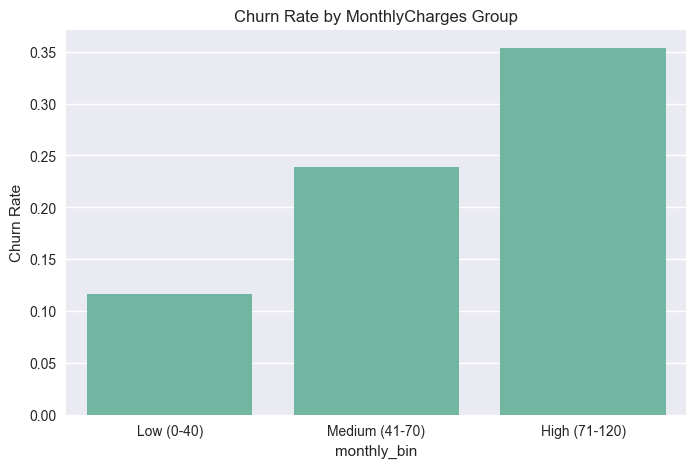

In [34]:
# ===============================
# 1. MonthlyCharges vs Churn
# ===============================
# 分箱
bins_mc = [0, 40, 70, 120]
labels_mc = ["Low (0-40)", "Medium (41-70)", "High (71-120)"]
df['monthly_bin'] = pd.cut(df['MonthlyCharges'], bins=bins_mc, labels=labels_mc, include_lowest=True)

# 每个分组的 churn 率
churn_by_monthly = df.groupby('monthly_bin')['Churn_bol'].mean().reset_index()

# 可视化
plt.figure(figsize=(8,5))
sns.barplot(data=churn_by_monthly, x='monthly_bin', y='Churn_bol')
plt.title("Churn Rate by MonthlyCharges Group")
plt.ylabel("Churn Rate")
plt.show()

### Insights:
* 构造新的feature: 
  * **monthly\_bin = {Low (0–40), Medium (41–70), High (71–120)}**
    * Low：churn 率最低 (\~11%) → 客户稳定。
    * Medium：churn 率中等 (\~24%) → 接近整体平均。
    * High：churn 率最高 (\~35%+) → 高费率客户风险显著增加。

In [35]:
# print min and max of monthly charges
print("Min MonthlyCharges:", df['MonthlyCharges'].min())
print("Max MonthlyCharges:", df['MonthlyCharges'].max())

Min MonthlyCharges: 18.25
Max MonthlyCharges: 118.75


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/3713098183.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_total = df.groupby('total_bin')['Churn_bol'].mean().reset_index()


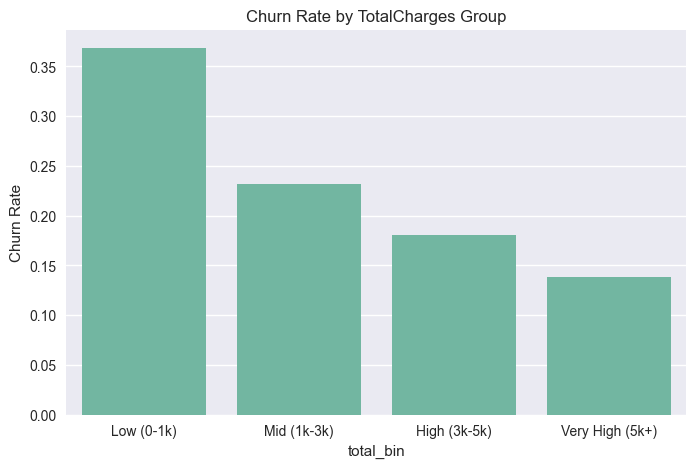

In [36]:
# ===============================
# 2. TotalCharges vs Churn
# ===============================
# 分箱
bins_tc = [0, 1000, 3000, 5000, 9000]
labels_tc = ["Low (0-1k)", "Mid (1k-3k)", "High (3k-5k)", "Very High (5k+)"]
df['total_bin'] = pd.cut(df['TotalCharges'], bins=bins_tc, labels=labels_tc, include_lowest=True)

# 每个分组的 churn 率
churn_by_total = df.groupby('total_bin')['Churn_bol'].mean().reset_index()

# 可视化
plt.figure(figsize=(8,5))
sns.barplot(data=churn_by_total, x='total_bin', y='Churn_bol')
plt.title("Churn Rate by TotalCharges Group")
plt.ylabel("Churn Rate")
plt.show()

### Insights:

* **TotalCharges 与 churn 呈间接关系**（主要通过 tenure 的长短体现）。
* Churn rate 随累计账单增加而逐步下降：

  * **Low (0–1k)：** churn 率最高 (\~37%) → 多为新客户，流失风险大。
  * **Mid (1k–3k)：** churn 率下降 (\~23%)。
  * **High (3k–5k)：** churn 率继续下降 (\~18%)。
  * **Very High (5k+)：** churn 最低 (\~14%) → 多为老客户，长期稳定。
* **Feature Engineering 启示**：

  * `TotalCharges` 信息高度重叠于 `tenure` → 存在多重共线性。
  * 建模时建议：

    * **丢弃 `TotalCharges`**（避免冗余）。
    * 或替代为 `AvgCharges = TotalCharges / tenure`（更直观反映客户平均价值）。

In [37]:
# print min and max of total charges
print("Min TotalCharges:", df['TotalCharges'].min())
print("Max TotalCharges:", df['TotalCharges'].max())

Min TotalCharges: 0.0
Max TotalCharges: 8684.8


## 4.7 Correlation Heatmap
- 相关性热力图

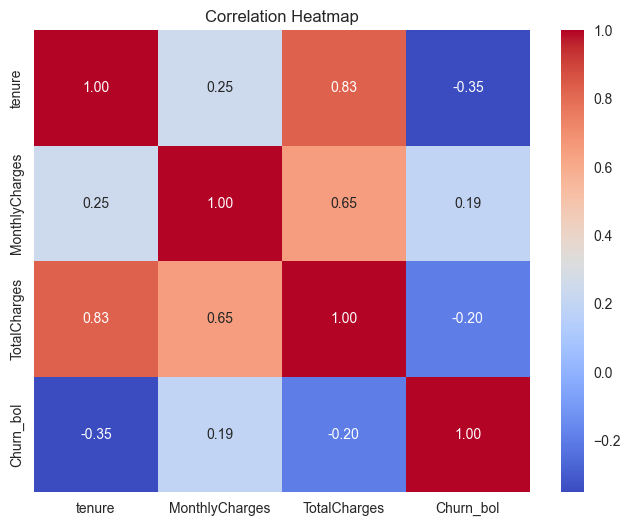

In [ ]:
plt.figure(figsize=(8,6))
corr = df[['tenure','MonthlyCharges','TotalCharges','Churn_bol']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Insights

* `tenure` 与 `TotalCharges` 高度相关（0.83），提示存在多重共线性，这也是后续构造 `AvgCharges` 的动机。
* `tenure` 与 `Churn` 显著负相关（-0.35），说明客户在网时间越久越稳定。
* `MonthlyCharges` 与 `Churn` 弱正相关（0.19），表明高价位客户的 churn 风险更高。
* `TotalCharges` 与 `Churn` 弱负相关（-0.20），但主要是由于其与 `tenure` 的高度相关性。

---

### Feature Engineering / 模型的启发

* **Logistic Regression**：可能需要去掉 `TotalCharges` 或用 `AvgCharges` 替代，避免多重共线性。
* **树模型 (XGB/LGBM)**：可以保留全部特征，但 `AvgCharges` 仍然有助于业务可解释性。

---

# 5. Conclusion & Insights

## Feature Engineering Notes

基于前面对 **Telco Customer Churn** 数据的探索性分析（EDA），我们得到以下洞见，并据此提出相应的特征工程设计。

---

### 1. Tenure（客户在网时长）

* **Insight**：

  * 短期客户（尤其是 0–6 月） churn 率极高（>50%）。
  * 中期客户（7–24 月） churn 率仍然偏高，但已明显下降。
  * 长期客户（25+ 月） churn 率较低，客户相对稳定。
* **Feature Engineering**：

  * `is_new_customer = tenure <= 6` → 标记高风险新用户。
  * `tenure_bin = {新 (0–6), 中 (7–24), 老 (25+)}` → 捕捉生命周期效应。
* **额外补充**:
  * 先画出 分箱后的 churn rate bar chart（就像 tenure 那张）。
  * 再判断 哪些区间 churn rate 明显高/低，据此分层。
  * 至于 “多少算高/中/低”，现实中需要结合业务，比如：
    * 电信公司觉得 流失率 >40% = 严重问题
    * 20–40% = 需要关注
    * <20% = 稳定

---

### 2. MonthlyCharges（月账单）

* **Insight**:
  * Low (0–40)：churn 最低 (~11%)  
  * Medium (41–70)：churn 中等 (~24%)  
  * High (71–120)：churn 最高 (~35%+)  
* **Feature Engineering**:
  * `monthly_bin = {Low, Medium, High}`  
  * Logistic Regression → 数值变量可做 StandardScaler  
  * 树模型 → 原始连续值足够，分箱增强解释性

---

### 3. TotalCharges（累计账单）

* **Insight**：

  * 与 `tenure` 高度正相关（0.83），可能导致多重共线性。
  * 与 churn 呈弱负相关（-0.20），主要是 tenure 的“影子效应”。
  * 数学上：TotalCharges ≈ MonthlyCharges × tenure
  * 所以 TotalCharges 高，其实常常意味着 “用户待得久”。
  * tenure 和 churn 已经是强负相关（-0.35），因此 TotalCharges 和 churn 的弱负相关（-0.20）其实只是 因为 tenure 的存在，它“影射”了 tenure 的信息，而不是 TotalCharges 本身的独立贡献。
  * 换句话说：👉 TotalCharges 与 churn 的负相关，不是因为“账单高的人就不流失”，而是因为“账单高的人大概率是老客户 → 老客户不流失”。

* **Feature Engineering**：

  * 可直接舍弃，避免与 `tenure` 强相关。
  * 或构造新特征：

    * `AvgCharges = TotalCharges / tenure`（tenure>0 时；否则可设为 0 或 MonthlyCharges）。
    * 更好地反映客户平均月消费水平。
  * 适用性：

    * **Logistic Regression**：推荐使用 `AvgCharges` 替代 TotalCharges。
    * **树模型**：可以保留全部，但 `AvgCharges` 能提升业务可解释性。

---

### 4. Demographics（客户属性）

* **Insight**：

  * Gender 对 churn 几乎没有影响 → 可能可舍弃。
  * SeniorCitizen、Partner、Dependents 等对 churn 有明显差异。
* **Feature Engineering**：

  * 保留有业务意义的类别特征（如 SeniorCitizen, Partner, Dependents）。
  * Gender 可在 Logistic Regression 中尝试剔除，减少噪音。

---

### 5. Services / Contract Features（服务/合约）

* **Insight**：

  * InternetService、Contract、PaymentMethod 等与 churn 差异显著。
  * PaperlessBilling 略有影响，但相对较小。
* **Feature Engineering**：

  * 保留核心特征：Contract, InternetService, PaymentMethod。
  * 类别变量统一做 **One-Hot Encoding**（用于 LR/树模型）。

---

### 6. Churn（目标变量）

* **Insight**：

  * churn 率约 \~26%，存在一定类别不平衡，但不算极端。
* **Model Implication**：

  * Logistic Regression：可考虑 class\_weight = "balanced"。
  * 树模型（XGB/LGBM）：可直接处理，必要时可做轻度 resampling。

---

## 🔹 下一步（EDA → 建模）

1. 导出的目标：一份“干净但未特征化”的数据集
    * 已做：确定性清洗（去空格、类型转换、规则性修正如 tenure=0 → TotalCharges=0）
    * 未做：任何会“学习统计量/边界”的操作（分箱、标准化、Encoder、平均值/中位数填补、目标编码等）—— 这些留到 model.ipynb 的 Pipeline 里，避免数据泄漏

2. 在 **model.ipynb** 中：

   * 划分 Train/Test 集（stratified split 保持 churn 比例）。
   * 特征编码（One-hot / Label Encoding）。
   * 标准化（仅对数值特征用于 LR）。
   * 建立 baseline 模型（Logistic Regression, XGBoost）。
   * 后续进行模型对比与调优。

---

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_check,tenure_group,Churn_bol,monthly_bin,total_bin
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,29.85,0-6,0,Low (0-40),Low (0-1k)
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,1936.30,25-36,0,Medium (41-70),Mid (1k-3k)
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,107.70,0-6,1,Medium (41-70),Low (0-1k)
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,1903.50,37-48,0,Medium (41-70),Mid (1k-3k)
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,141.40,0-6,1,High (71-120),Low (0-1k)


In [ ]:
# Export the cleaned DataFrame to CSV and Parquet formats for modeling and analysis

import pandas as pd
import numpy as np

# 1) 读取原始 CSV
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2) 基础清洗（只做确定性操作）
# 去空格 → NaN；关键列类型转换
df = df.replace(" ", np.nan)

# 转数值
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# tenure=0 → TotalCharges=0（业务规则）
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

# 去重（以 customerID 为主键）
df = df.drop_duplicates(subset=['customerID'])

# 明确布尔/类别列的 dtype（不做编码，仅声明）
# 作用：把原本 "Yes"/"No" 的文本列转换成 布尔值 True/False
# 不需要再浪费 One-Hot 两个 dummy 列，直接 True/False 就够
bool_like = ['PaperlessBilling']
for c in bool_like:
    if c in df.columns:
        df[c] = df[c].map({'Yes': True, 'No': False})

cat_cols = [
    'gender','SeniorCitizen','Partner','Dependents',
    'PhoneService','MultipleLines','InternetService','OnlineSecurity',
    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod'
]
# 把这些列显式声明为 pandas 的 category dtype
# 后续在 OneHotEncoder 里，编码器会知道完整的类别集合
# 为后续的 One-Hot Encoding 做准备
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('category')

# 3) 保留 customerID（供线上/预测对齐），但建模时排除
# # 4) 简要数据一致性检查（可选）
# assert df['tenure'].ge(0).all(), "tenure 有非法值"
# assert df['MonthlyCharges'].ge(0).all(), "MonthlyCharges 有非法值"
# assert df['TotalCharges'].ge(0).fillna(True).all(), "TotalCharges 有非法值"

# 5) 同时导出 Parquet + CSV（未特征化）
# 更快 I/O、天然压缩（snappy）、保存精确 dtype（尤其是分类/浮点）
# 业界常用列式存储格式
df.to_parquet("data/clean_telco.parquet", index=False)
df.to_csv("data/clean_telco.csv", index=False)

print("Saved: data/clean_telco.parquet & data/clean_telco.csv")


Saved: data/clean_telco.parquet & data/clean_telco.csv


In [41]:
# pip install -U "pandas" "pyarrow"